In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

file_path = '/Users/iranblanco/Desktop/ANA 500/MicroProjects/gym_members_exercise_tracking.csv'
gym_data = pd.read_csv(file_path)
gym_data.head()

2024-11-22 19:49:19.361351: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [2]:
# Number of rows and columns 
dataset_size = gym_data.shape
print(f"The dataset contains {dataset_size[0]} rows and {dataset_size[1]} columns.")

The dataset contains 973 rows and 15 columns.


In [3]:
# Names of each column 
column_names = gym_data.columns
print("Column names:", column_names)

Column names: Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')


In [4]:
# Remove spaces and units from column names
gym_data.columns = [
    'Age', 'Gender', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 
    'Session_Duration', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 
    'Water_Intake', 'Workout_Frequency', 'Experience_Level', 'BMI'
]
gym_data.columns

Index(['Age', 'Gender', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration', 'Calories_Burned', 'Workout_Type',
       'Fat_Percentage', 'Water_Intake', 'Workout_Frequency',
       'Experience_Level', 'BMI'],
      dtype='object')

In [5]:
# Scaler
scaler = MinMaxScaler()

# Columns selected
gym_data[['Weight_Scaled', 'Height_Scaled']] = scaler.fit_transform(gym_data[['Weight', 'Height']])
print(gym_data[['Weight', 'Height', 'Weight_Scaled', 'Height_Scaled']].head())

   Weight  Height  Weight_Scaled  Height_Scaled
0    88.3    1.71       0.537264           0.42
1    74.9    1.53       0.388209           0.06
2    68.1    1.66       0.312570           0.32
3    53.2    1.70       0.146830           0.40
4    46.1    1.79       0.067853           0.58


In [6]:
# Missing values
missing_values = gym_data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Age                  0
Gender               0
Weight               0
Height               0
Max_BPM              0
Avg_BPM              0
Resting_BPM          0
Session_Duration     0
Calories_Burned      0
Workout_Type         0
Fat_Percentage       0
Water_Intake         0
Workout_Frequency    0
Experience_Level     0
BMI                  0
Weight_Scaled        0
Height_Scaled        0
dtype: int64


In [7]:
# Duplicate rows
duplicate_rows = gym_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [8]:
# Data types
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                973 non-null    int64  
 1   Gender             973 non-null    object 
 2   Weight             973 non-null    float64
 3   Height             973 non-null    float64
 4   Max_BPM            973 non-null    int64  
 5   Avg_BPM            973 non-null    int64  
 6   Resting_BPM        973 non-null    int64  
 7   Session_Duration   973 non-null    float64
 8   Calories_Burned    973 non-null    float64
 9   Workout_Type       973 non-null    object 
 10  Fat_Percentage     973 non-null    float64
 11  Water_Intake       973 non-null    float64
 12  Workout_Frequency  973 non-null    int64  
 13  Experience_Level   973 non-null    int64  
 14  BMI                973 non-null    float64
 15  Weight_Scaled      973 non-null    float64
 16  Height_Scaled      973 non

In [9]:
gym_data.describe()

,Age,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI,Weight_Scaled,Height_Scaled
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127,0.376581,0.445159
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879,0.235901,0.255440
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000,0.000000,0.000000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000,0.201335,0.240000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000,0.333704,0.420000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000,0.511680,0.600000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000,1.000000,1.000000


In [10]:
# Statistics for key variables
summary_stats = gym_data[['Calories_Burned', 'Session_Duration', 'Weight_Scaled', 'Age', 'Fat_Percentage']].describe()

summary_stats

,Calories_Burned,Session_Duration,Weight_Scaled,Age,Fat_Percentage
count,973.000000,973.000000,973.000000,973.000000,973.000000
mean,905.422405,1.256423,0.376581,38.683453,24.976773
std,272.641516,0.343033,0.235901,12.180928,6.259419
min,303.000000,0.500000,0.000000,18.000000,10.000000
25%,720.000000,1.040000,0.201335,28.000000,21.300000
50%,893.000000,1.260000,0.333704,40.000000,26.200000
75%,1076.000000,1.460000,0.511680,49.000000,29.300000
max,1783.000000,2.000000,1.000000,59.000000,35.000000


In [11]:
# Gender distribution
gender_counts = gym_data['Gender'].value_counts(normalize=True) * 100
gender_counts = gender_counts.round(2)
print(gender_counts)

Gender
Male      52.52
Female    47.48
Name: proportion, dtype: float64


In [12]:
# Preserve original dataset, do not overwrite
gym_data_updated = gym_data.copy()

# Encode Gender with 0 for Male and 1 for Female
gender_mapping = {'Male': 0, 'Female': 1}
gym_data_updated['Gender_Encoded'] = gym_data['Gender'].map(gender_mapping)

# Encode Workout_Type 
workout_type_mapping = {'Yoga': 1, 'HIIT': 2, 'Cardio': 3, 'Strength': 4}
gym_data_updated['Workout_Type_Encoded'] = gym_data['Workout_Type'].map(workout_type_mapping)

gym_data_updated.head()

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI,Weight_Scaled,Height_Scaled,Gender_Encoded,Workout_Type_Encoded
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,0.537264,0.42,0,1
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,0.388209,0.06,1,2
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,0.312570,0.32,1,3
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,0.146830,0.40,0,4
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,0.067853,0.58,0,4


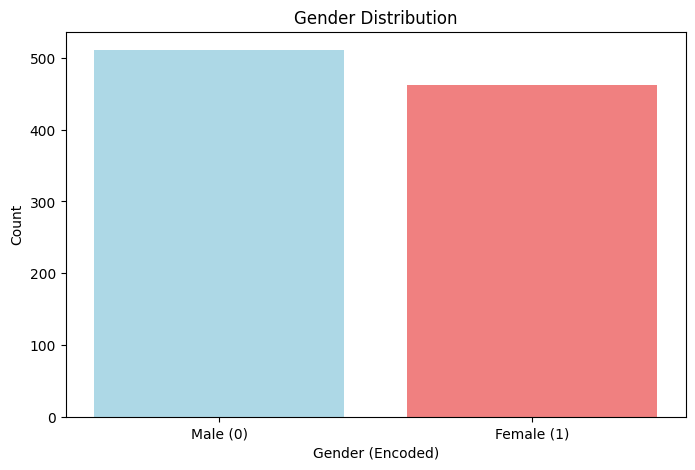

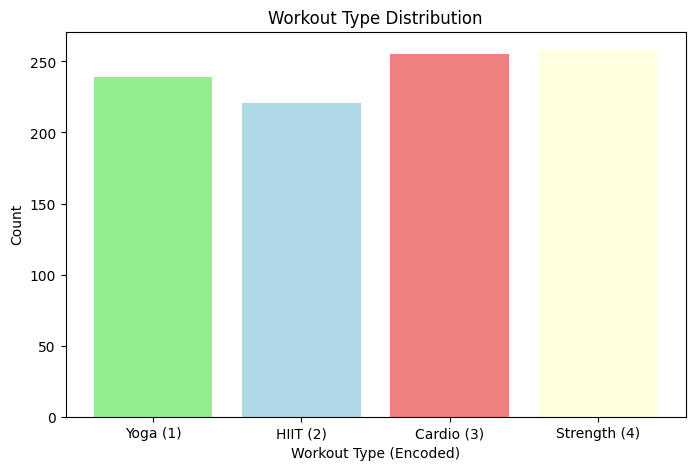

In [13]:
# Gender Visual
plt.figure(figsize=(8, 5))
gender_counts = gym_data_updated['Gender_Encoded'].value_counts().sort_index()
plt.bar(gender_counts.index, gender_counts.values, color=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.xticks([0, 1], ['Male (0)', 'Female (1)'])
plt.xlabel('Gender (Encoded)')
plt.ylabel('Count')
plt.show()

# Workout_Type Visual
plt.figure(figsize=(8, 5))
workout_counts = gym_data_updated['Workout_Type_Encoded'].value_counts().sort_index()
plt.bar(workout_counts.index, workout_counts.values, color=['lightgreen', 'lightblue', 'lightcoral', 'lightyellow'])
plt.title('Workout Type Distribution')
plt.xticks([1, 2, 3, 4], ['Yoga (1)', 'HIIT (2)', 'Cardio (3)', 'Strength (4)'])
plt.xlabel('Workout Type (Encoded)')
plt.ylabel('Count')
plt.show()

In [14]:
# Identify outliers using IQR method
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Identify outliers for each variable
outliers_session_duration = find_outliers_iqr(gym_data_updated, 'Session_Duration')
outliers_calories_burned = find_outliers_iqr(gym_data_updated, 'Calories_Burned')
outliers_weight = find_outliers_iqr(gym_data_updated, 'Weight')
outliers_fat_percentage = find_outliers_iqr(gym_data_updated, 'Fat_Percentage')
outliers_age = find_outliers_iqr(gym_data_updated, 'Age')

print("Outliers in Session_Duration:", outliers_session_duration.shape[0])
print("Outliers in Calories_Burned:", outliers_calories_burned.shape[0])
print("Outliers in Weight:", outliers_weight.shape[0])
print("Outliers in Fat_Percentage:", outliers_fat_percentage.shape[0])
print("Outliers in Age:", outliers_age.shape[0])

Outliers in Session_Duration: 0
Outliers in Calories_Burned: 10
Outliers in Weight: 9
Outliers in Fat_Percentage: 0
Outliers in Age: 0


In [15]:
# Outliers in Calories_Burned and Weight
print("Calories_Burned Outliers:\n", outliers_calories_burned)
print("Weight Outliers:\n", outliers_weight)

Calories_Burned Outliers:
      Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
90    25    Male    81.5    1.61      170      159           63   
99    24  Female    60.1    1.79      170      165           63   
124   26    Male    86.2    1.68      189      157           72   
475   27    Male    89.3    1.64      192      162           64   
511   39    Male    86.2    1.82      191      160           72   
572   36    Male    88.0    1.71      185      160           73   
646   22    Male    88.5    1.62      174      162           69   
712   19    Male    82.4    1.96      174      169           62   
728   47    Male    87.2    1.64      177      165           50   
910   32    Male    89.8    1.92      199      168           67   

     Session_Duration  Calories_Burned Workout_Type  Fat_Percentage  \
90               1.93           1688.0         HIIT            10.9   
99               1.97           1625.0       Cardio            15.9   
124              1.97 

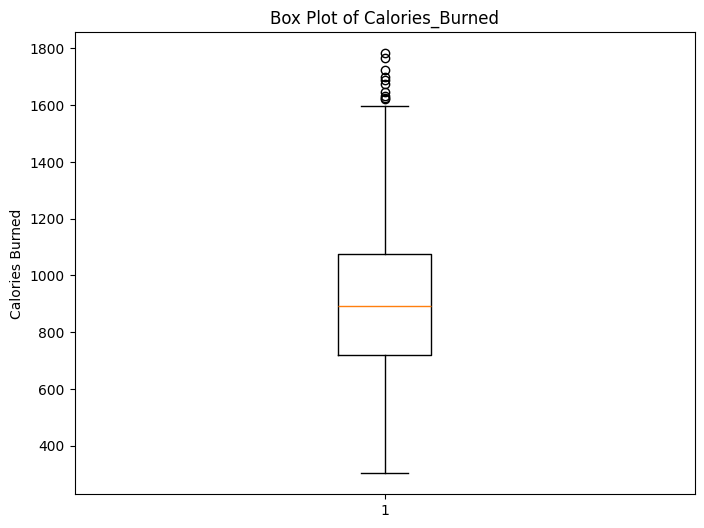

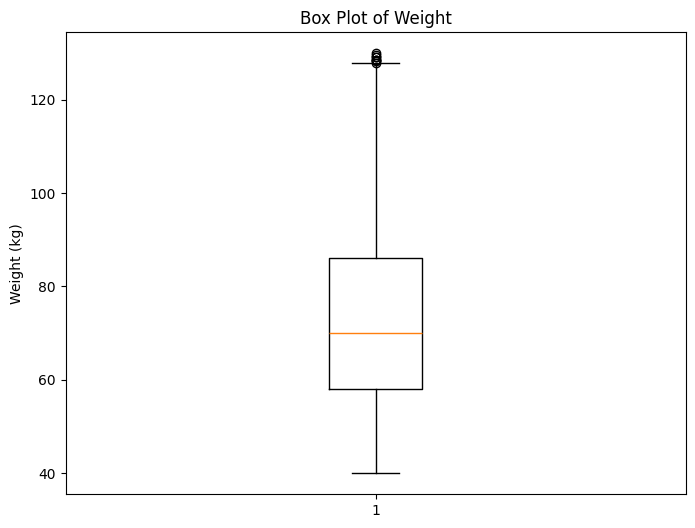

In [16]:
# Box plot for Calories_Burned
plt.figure(figsize=(8, 6))
plt.boxplot(gym_data_updated['Calories_Burned'])
plt.title('Box Plot of Calories_Burned')
plt.ylabel('Calories Burned')
plt.show()

# Box plot for Weight
plt.figure(figsize=(8, 6))
plt.boxplot(gym_data_updated['Weight'])
plt.title('Box Plot of Weight')
plt.ylabel('Weight (kg)')
plt.show()

In [17]:
# Median split
calories_median = gym_data_updated['Calories_Burned'].median()
gym_data_updated['Calorie_Burn_New'] = (gym_data_updated['Calories_Burned'] > calories_median).astype(int)

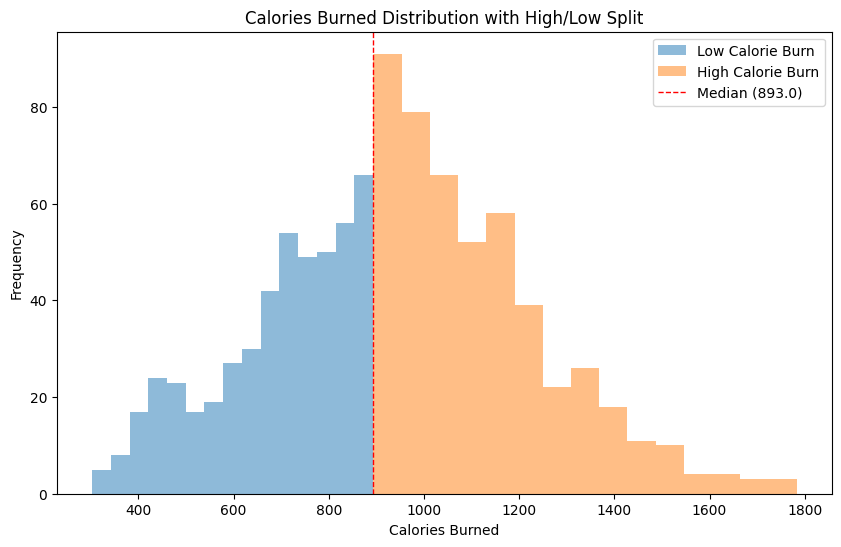

In [18]:
# Plot histogram with binary split
plt.figure(figsize=(10, 6))
plt.hist(gym_data_updated[gym_data_updated['Calorie_Burn_New'] == 0]['Calories_Burned'], bins=15, alpha=0.5, label='Low Calorie Burn')
plt.hist(gym_data_updated[gym_data_updated['Calorie_Burn_New'] == 1]['Calories_Burned'], bins=15, alpha=0.5, label='High Calorie Burn')
plt.axvline(calories_median, color='red', linestyle='dashed', linewidth=1, label=f'Median ({calories_median})')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.title('Calories Burned Distribution with High/Low Split')
plt.legend()
plt.show()

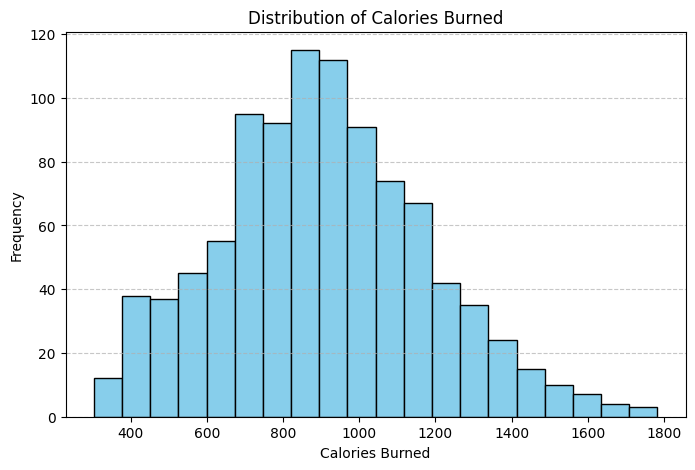

In [19]:
# Calories Burned Visual
plt.figure(figsize=(8, 5))
plt.hist(gym_data['Calories_Burned'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

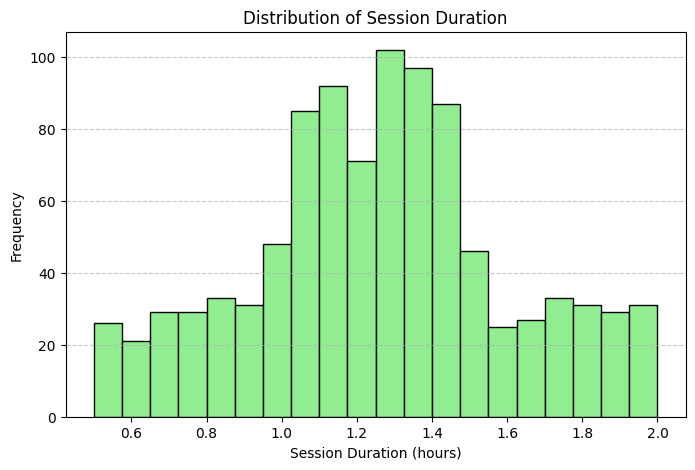

In [20]:
# Session Duration Visual
plt.figure(figsize=(8, 5))
plt.hist(gym_data['Session_Duration'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

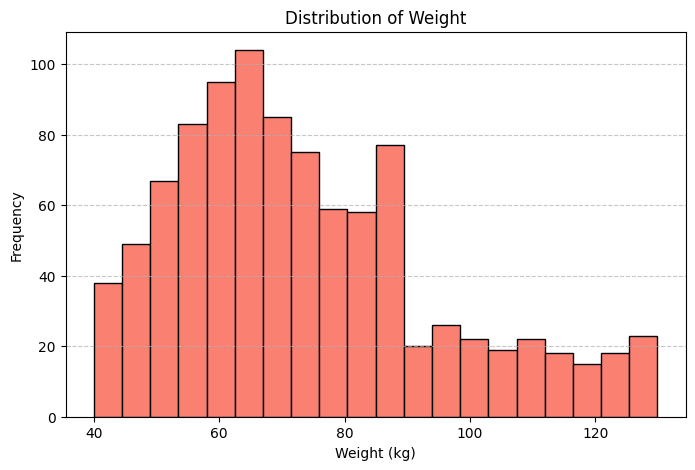

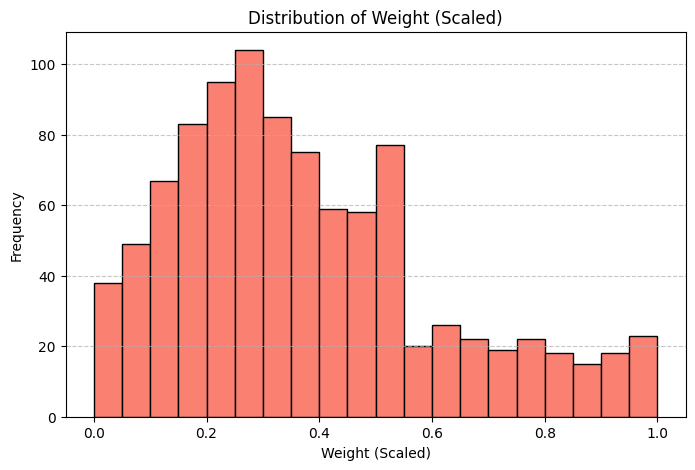

In [21]:
# Weight Visual
plt.figure(figsize=(8, 5))
plt.hist(gym_data['Weight'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Weight_Scaled Visual
plt.figure(figsize=(8, 5))
plt.hist(gym_data_updated['Weight_Scaled'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Weight (Scaled)')
plt.xlabel('Weight (Scaled)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

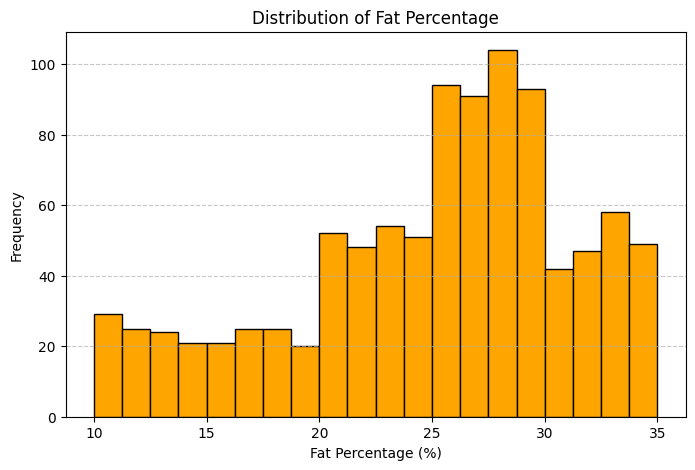

In [22]:
# Fat Percentage Visual
plt.figure(figsize=(8, 5))
plt.hist(gym_data['Fat_Percentage'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Fat Percentage')
plt.xlabel('Fat Percentage (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

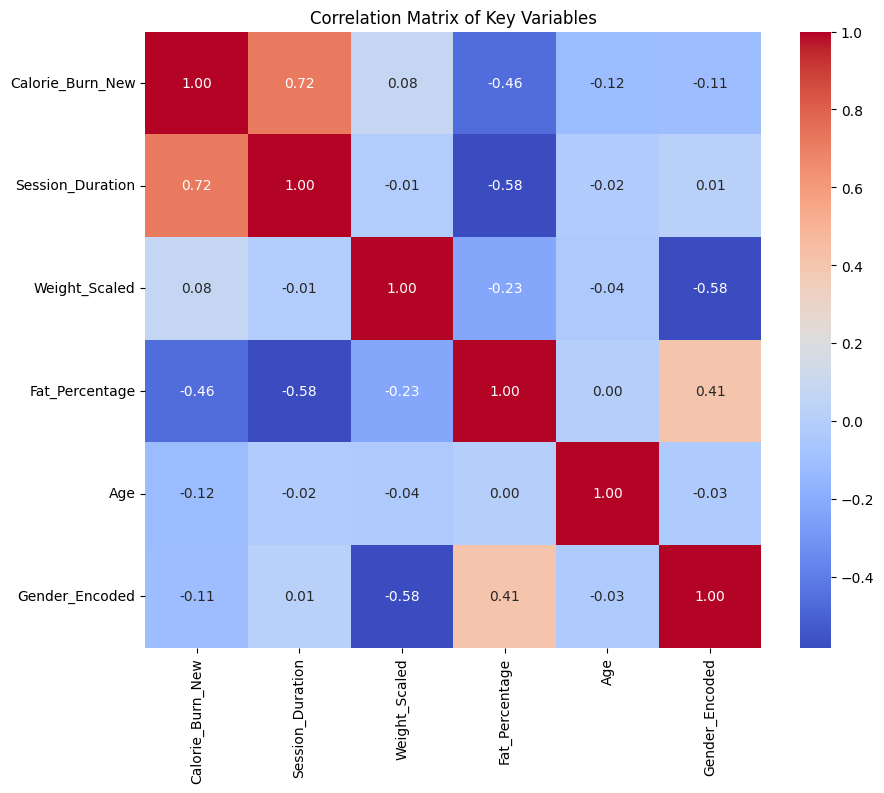

In [23]:
# Correlation matrix Columns
correlation_data = gym_data_updated[['Calorie_Burn_New', 'Session_Duration', 'Weight_Scaled', 'Fat_Percentage', 'Age', 'Gender_Encoded']]

# Correlation matrix plot
plt.figure(figsize=(10, 8))
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f")
plt.title('Correlation Matrix of Key Variables')
plt.show()

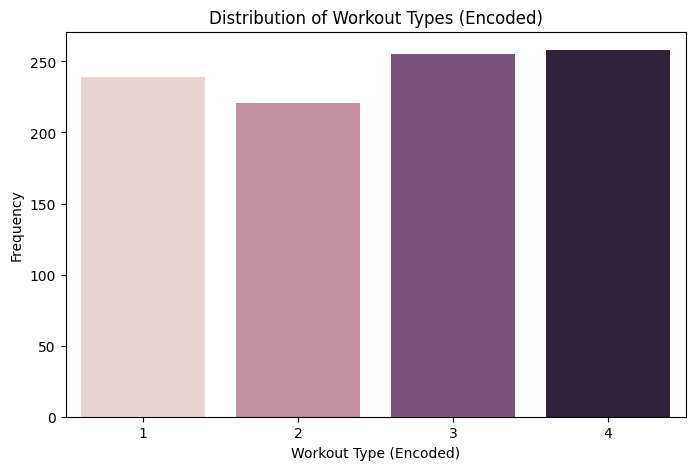

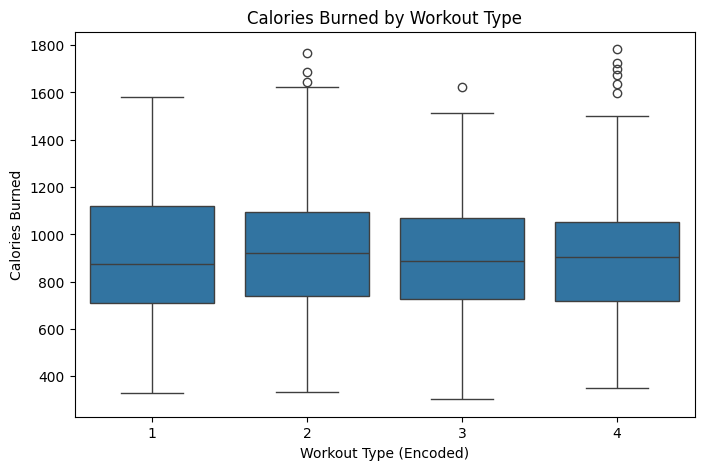

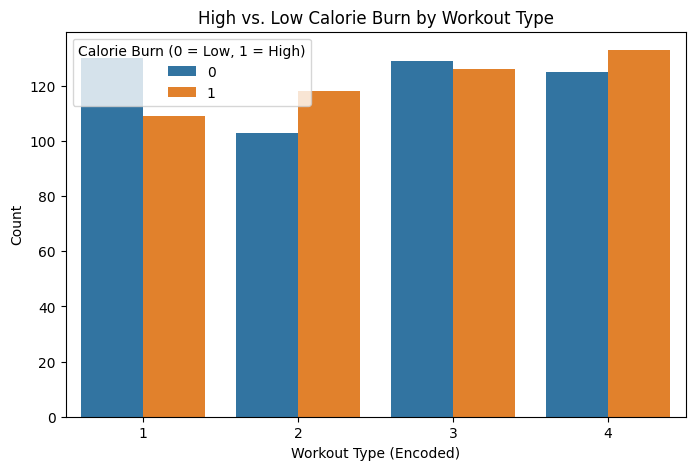

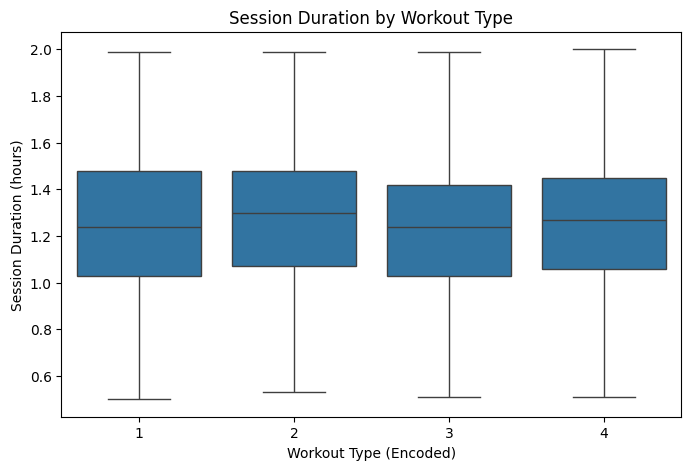

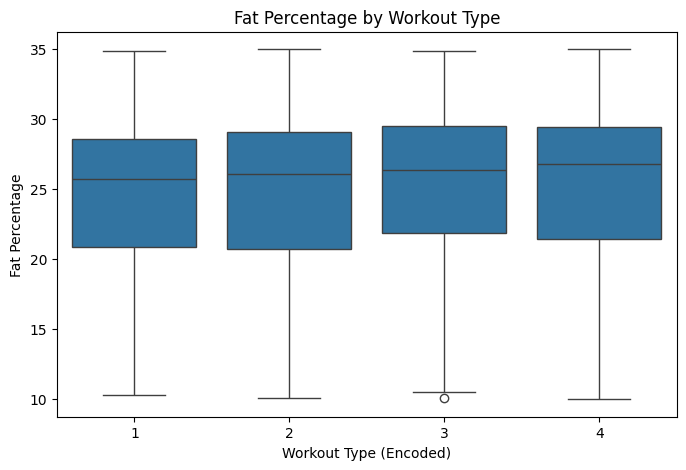

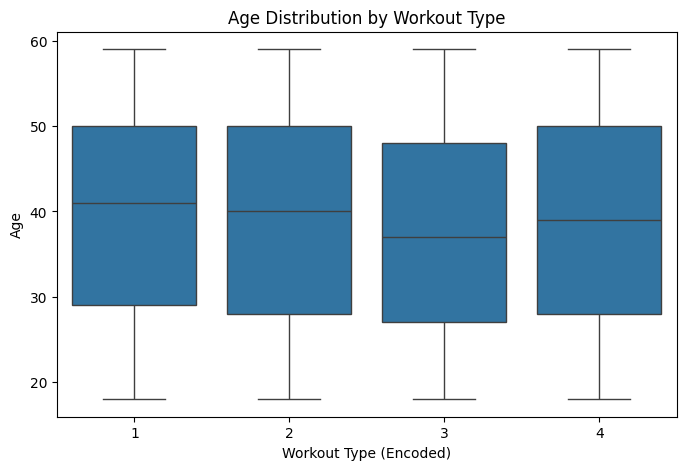

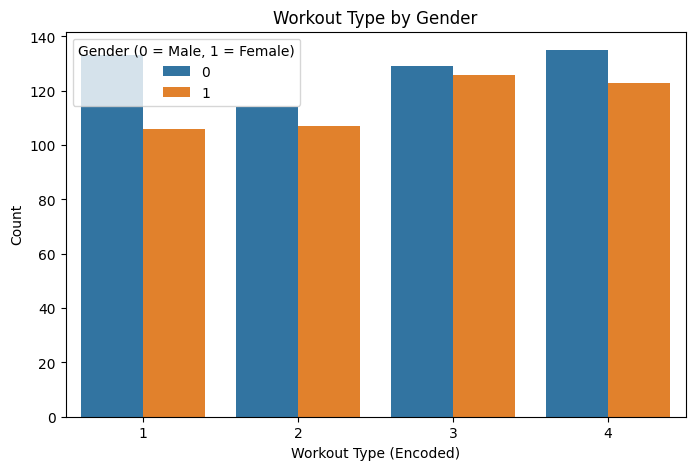

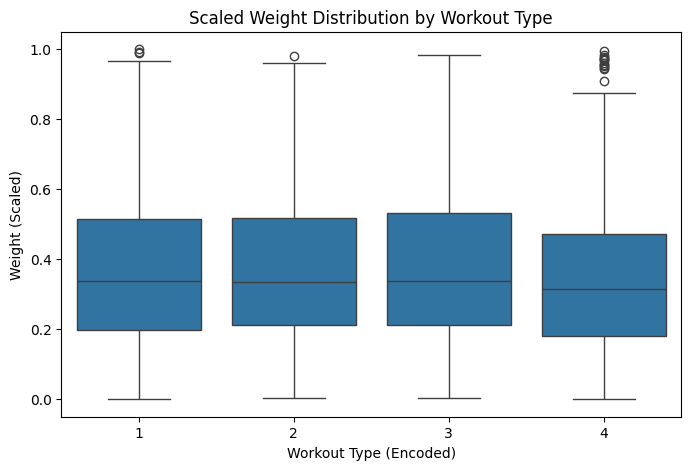

In [24]:
# Distribution of Workout_Type_Encoded
plt.figure(figsize=(8, 5))
sns.countplot(data=gym_data_updated, x='Workout_Type_Encoded', hue='Workout_Type_Encoded', dodge=False, legend=False)
plt.title('Distribution of Workout Types (Encoded)')
plt.xlabel('Workout Type (Encoded)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Workout_Type_Encoded vs Calories Burned
plt.figure(figsize=(8, 5))
sns.boxplot(data=gym_data_updated, x='Workout_Type_Encoded', y='Calories_Burned')
plt.title('Calories Burned by Workout Type')
plt.xlabel('Workout Type (Encoded)')
plt.ylabel('Calories Burned')
plt.show()
#---
plt.figure(figsize=(8, 5))
sns.countplot(data=gym_data_updated, x='Workout_Type_Encoded', hue='Calorie_Burn_New')
plt.title('High vs. Low Calorie Burn by Workout Type')
plt.xlabel('Workout Type (Encoded)')
plt.ylabel('Count')
plt.legend(title='Calorie Burn (0 = Low, 1 = High)')
plt.show()

# Distribution of Workout_Type_Encoded vs Session Duration
plt.figure(figsize=(8, 5))
sns.boxplot(data=gym_data_updated, x='Workout_Type_Encoded', y='Session_Duration')
plt.title('Session Duration by Workout Type')
plt.xlabel('Workout Type (Encoded)')
plt.ylabel('Session Duration (hours)')
plt.show()

# Distribution of Workout_Type_Encoded vs Fat Percentage
plt.figure(figsize=(8, 5))
sns.boxplot(data=gym_data_updated, x='Workout_Type_Encoded', y='Fat_Percentage')
plt.title('Fat Percentage by Workout Type')
plt.xlabel('Workout Type (Encoded)')
plt.ylabel('Fat Percentage')
plt.show()

# Distribution of Workout_Type_Encoded vs Age
plt.figure(figsize=(8, 5))
sns.boxplot(data=gym_data_updated, x='Workout_Type_Encoded', y='Age')
plt.title('Age Distribution by Workout Type')
plt.xlabel('Workout Type (Encoded)')
plt.ylabel('Age')
plt.show()

# Distribution of Workout_Type_Encoded vs Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=gym_data_updated, x='Workout_Type_Encoded', hue='Gender_Encoded')
plt.title('Workout Type by Gender')
plt.xlabel('Workout Type (Encoded)')
plt.ylabel('Count')
plt.legend(title='Gender (0 = Male, 1 = Female)')
plt.show()

# Distribution of Workout_Type_Encoded vs Weight
plt.figure(figsize=(8, 5))
sns.boxplot(data=gym_data_updated, x='Workout_Type_Encoded', y='Weight_Scaled')
plt.title('Scaled Weight Distribution by Workout Type')
plt.xlabel('Workout Type (Encoded)')
plt.ylabel('Weight (Scaled)')
plt.show()

In [25]:
# Features and target 
X = gym_data_updated[['Workout_Type_Encoded', 'Session_Duration', 'Weight_Scaled', 'Gender_Encoded', 'Age', 'Fat_Percentage']]
y = gym_data_updated['Calorie_Burn_New']

# 80/20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
# Logistic Regression
model_logistic = LogisticRegression(random_state=1)
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.predict(X_test)

# Confusion Matrix 
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

print("Logistic Regression Confusion Matrix:\n", cm_logistic)
print(f"Accuracy: {accuracy_logistic}, Precision: {precision_logistic}, Recall: {recall_logistic}, F1 Score: {f1_logistic}")

# ROC-AUC 
y_pred_probs_logistic = model_logistic.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_probs_logistic)
auc_logistic = roc_auc_score(y_test, y_pred_probs_logistic)

print(f"Logistic Regression AUC: {auc_logistic:.2f}")

Logistic Regression Confusion Matrix:
 [[92 16]
 [12 75]]
Accuracy: 0.8564102564102564, Precision: 0.8241758241758241, Recall: 0.8620689655172413, F1 Score: 0.8426966292134831
Logistic Regression AUC: 0.95


In [27]:
# Logistic Regression Coefficients
feature_names = X.columns
coef = model_logistic.coef_[0]
print("\nLogistic Regression Coefficients:")
for feature, weight in zip(feature_names, coef):
    print(f"{feature}: {weight:.3f}")


Logistic Regression Coefficients:
Workout_Type_Encoded: 0.134
Session_Duration: 7.917
Weight_Scaled: 0.045
Gender_Encoded: -0.776
Age: -0.039
Fat_Percentage: -0.066


In [28]:
# SVM with Linear Kernel
model_svm_linear = SVC(kernel='linear', random_state=1)
model_svm_linear.fit(X_train, y_train)

y_pred_svm_linear = model_svm_linear.predict(X_test)

# Confusion Matrix
cm_svm_linear = confusion_matrix(y_test, y_pred_svm_linear)
accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
precision_svm_linear = precision_score(y_test, y_pred_svm_linear)
recall_svm_linear = recall_score(y_test, y_pred_svm_linear)
f1_svm_linear = f1_score(y_test, y_pred_svm_linear)

print("SVM Linear Kernel Confusion Matrix:\n", cm_svm_linear)
print(f"Accuracy: {accuracy_svm_linear}, Precision: {precision_svm_linear}, Recall: {recall_svm_linear}, F1 Score: {f1_svm_linear}")

# ROC-AUC 
y_pred_probs_svm_linear = model_svm_linear.decision_function(X_test)
fpr_svm_linear, tpr_svm_linear, _ = roc_curve(y_test, y_pred_probs_svm_linear)
auc_svm_linear = roc_auc_score(y_test, y_pred_probs_svm_linear)

print(f"SVM Linear Kernel AUC: {auc_svm_linear:.2f}")

SVM Linear Kernel Confusion Matrix:
 [[91 17]
 [ 9 78]]
Accuracy: 0.8666666666666667, Precision: 0.8210526315789474, Recall: 0.896551724137931, F1 Score: 0.8571428571428571
SVM Linear Kernel AUC: 0.94


In [29]:
# SVM with RBF Kernel
model_svm_rbf = SVC(kernel='rbf', random_state=1)
model_svm_rbf.fit(X_train, y_train)
# Predictions
y_pred_svm_rbf = model_svm_rbf.predict(X_test)

# Confusion Matrix 
cm_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
precision_svm_rbf = precision_score(y_test, y_pred_svm_rbf)
recall_svm_rbf = recall_score(y_test, y_pred_svm_rbf)
f1_svm_rbf = f1_score(y_test, y_pred_svm_rbf)

print("SVM RBF Kernel Confusion Matrix:\n", cm_svm_rbf)
print(f"Accuracy: {accuracy_svm_rbf}, Precision: {precision_svm_rbf}, Recall: {recall_svm_rbf}, F1 Score: {f1_svm_rbf}")

# ROC-AUC
y_pred_probs_svm_rbf = model_svm_rbf.decision_function(X_test)
fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(y_test, y_pred_probs_svm_rbf)
auc_svm_rbf = roc_auc_score(y_test, y_pred_probs_svm_rbf)

print(f"SVM RBF Kernel AUC: {auc_svm_rbf:.2f}")

SVM RBF Kernel Confusion Matrix:
 [[90 18]
 [34 53]]
Accuracy: 0.7333333333333333, Precision: 0.7464788732394366, Recall: 0.6091954022988506, F1 Score: 0.6708860759493671
SVM RBF Kernel AUC: 0.78


Decision Tree Confusion Matrix:
 [[93 15]
 [10 77]]
Accuracy: 0.8717948717948718, Precision: 0.8369565217391305, Recall: 0.8850574712643678, F1 Score: 0.8603351955307262
Decision Tree AUC: 0.92


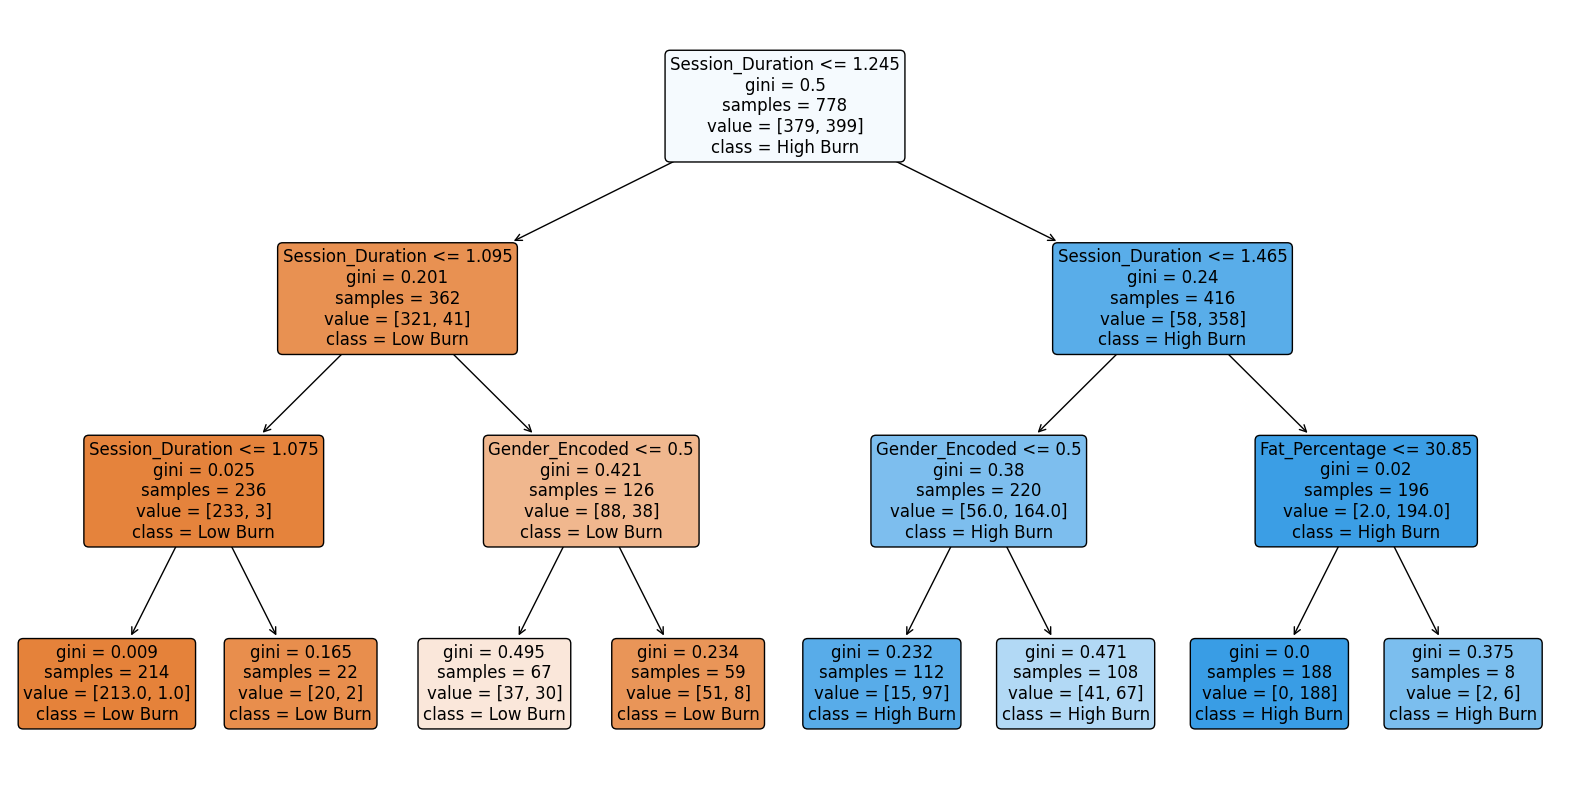

In [30]:
# Decision Tree Model 
model_tree = DecisionTreeClassifier(random_state=1, max_depth=3)  
model_tree.fit(X_train, y_train)

y_pred_tree = model_tree.predict(X_test)

# Confusion Matrix 
cm_tree = confusion_matrix(y_test, y_pred_tree)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print("Decision Tree Confusion Matrix:\n", cm_tree)
print(f"Accuracy: {accuracy_tree}, Precision: {precision_tree}, Recall: {recall_tree}, F1 Score: {f1_tree}")

# ROC-AUC
y_pred_probs_tree = model_tree.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_probs_tree)
auc_tree = roc_auc_score(y_test, y_pred_probs_tree)

print(f"Decision Tree AUC: {auc_tree:.2f}")

# Decision Tree Visual
plt.figure(figsize=(20, 10))  # Smaller figure size for readability
plot_tree(model_tree, feature_names=X.columns, class_names=['Low Burn', 'High Burn'], filled=True, rounded=True, fontsize=12)
plt.show()

In [31]:
# Summary Table of Results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM Linear Kernel', 'SVM RBF Kernel', 'Decision Tree'],
    'Accuracy': [accuracy_logistic, accuracy_svm_linear, accuracy_svm_rbf, accuracy_tree],
    'Precision': [precision_logistic, precision_svm_linear, precision_svm_rbf, precision_tree],
    'Recall': [recall_logistic, recall_svm_linear, recall_svm_rbf, recall_tree],
    'F1 Score': [f1_logistic, f1_svm_linear, f1_svm_rbf, f1_tree],
    'AUC': [auc_logistic, auc_svm_linear, auc_svm_rbf, auc_tree]  # Add AUC values
})

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0  Logistic Regression  0.856410   0.824176  0.862069  0.842697  0.946041
1    SVM Linear Kernel  0.866667   0.821053  0.896552  0.857143  0.944125
2       SVM RBF Kernel  0.733333   0.746479  0.609195  0.670886  0.784057
3        Decision Tree  0.871795   0.836957  0.885057  0.860335  0.917625


Based on the results in the model comparison table, both Logistic Regression and SVM with Linear Kernel achieved high F1 scores, making them strong candidates. Here’s the reasoning behind selecting one over the other:

- **SVM (Linear Kernel)**: Achieved slightly higher recall and F1 score, which makes it a good choice for capturing high-calorie burns accurately.
- **Logistic Regression**: Although its recall is slightly lower than SVM, Logistic Regression offers interpretability through feature coefficients.

Given the balance of interpretability and performance, I’ve chosen to prioritize **SVM Linear Kernel** for its slightly higher recall and F1 score. However, Logistic Regression remains a valuable model due to its interpretability in understanding how each feature contributes to high vs. low-calorie burns


Logistic Regression Cross-Validation F1 Score: 0.8658877028264438
SVM Linear Kernel Cross-Validation F1 Score: 0.8723898607899571


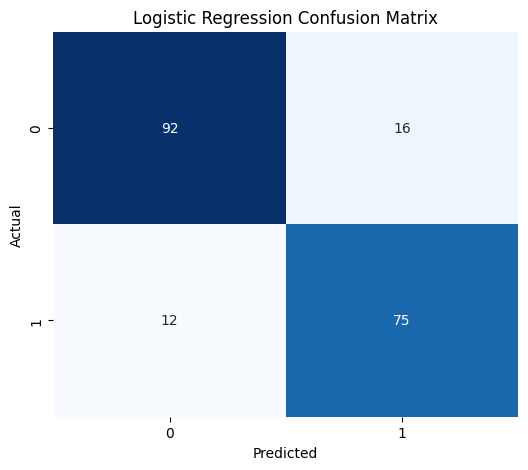

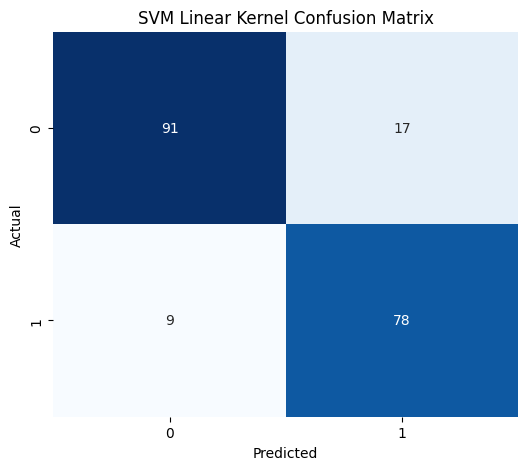

In [33]:
#Cross-Validation
# Logistic Regression Cross-Validation
logistic_cv_scores = cross_val_score(model_logistic, X, y, cv=5, scoring='f1')
print("\nLogistic Regression Cross-Validation F1 Score:", logistic_cv_scores.mean())

# SVM Linear Kernel Cross-Validation
svm_linear_cv_scores = cross_val_score(model_svm_linear, X, y, cv=5, scoring='f1')
print("SVM Linear Kernel Cross-Validation F1 Score:", svm_linear_cv_scores.mean())

#Confusion Matrix 
# Logistic Regression Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# SVM Linear Kernel Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm_linear, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM Linear Kernel Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

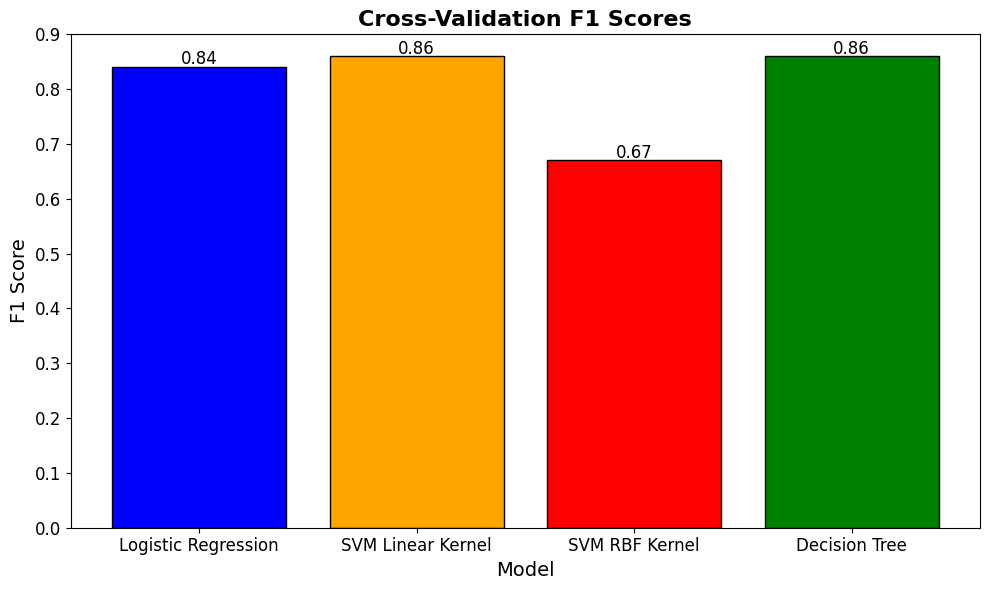

In [34]:
# Cross-validation F1 scores 
models = ['Logistic Regression', 'SVM Linear Kernel', 'SVM RBF Kernel', 'Decision Tree']
f1_scores = [0.84, 0.86, 0.67, 0.86] 

# Bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, f1_scores, color=['blue', 'orange', 'red', 'green'], edgecolor='black')

plt.title('Cross-Validation F1 Scores', fontsize=16, weight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.ylim(0.0, 0.9)  # Adjust y-axis limits for better visualization
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Bar Annotation
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005,
             f'{bar.get_height():.2f}', ha='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()

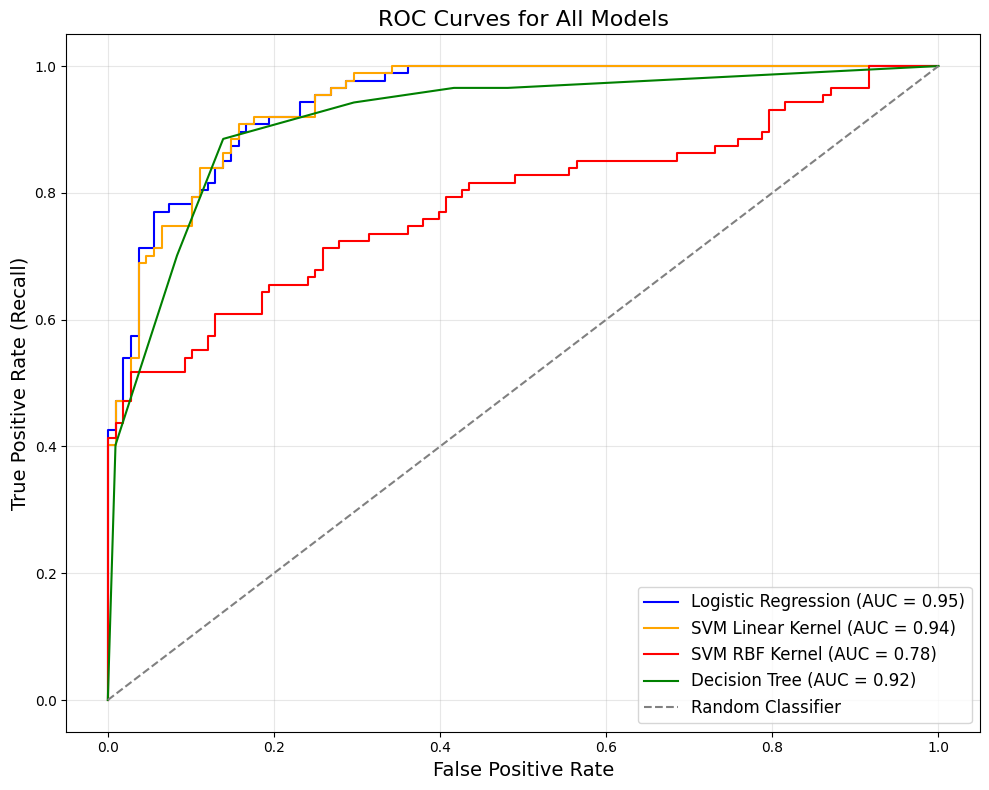

In [35]:
# Combined ROC Curve Plot
plt.figure(figsize=(10, 8))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {auc_logistic:.2f})', color='blue')
plt.plot(fpr_svm_linear, tpr_svm_linear, label=f'SVM Linear Kernel (AUC = {auc_svm_linear:.2f})', color='orange')
plt.plot(fpr_svm_rbf, tpr_svm_rbf, label=f'SVM RBF Kernel (AUC = {auc_svm_rbf:.2f})', color='red')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})', color='green')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.title('ROC Curves for All Models', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate (Recall)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [36]:
# Feedforward Neural Network (FNN) build
model_fnn = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),  # Dropout for regularization
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile model
model_fnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_fnn = model_fnn.fit(X_train, y_train, 
                            validation_data=(X_test, y_test),
                            epochs=20, batch_size=16, 
                            callbacks=[early_stopping], 
                            verbose=1)

# Evaluate model on test set
test_loss_fnn, test_accuracy_fnn = model_fnn.evaluate(X_test, y_test)
print(f"FNN Test Accuracy: {test_accuracy_fnn:.2f}")


Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5414 - loss: 1.5841 - val_accuracy: 0.6103 - val_loss: 0.6324
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5653 - loss: 1.0764 - val_accuracy: 0.6308 - val_loss: 0.6588
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5963 - loss: 0.8256 - val_accuracy: 0.6308 - val_loss: 0.6067
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6199 - loss: 0.7148 - val_accuracy: 0.6718 - val_loss: 0.6104
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5577 - loss: 0.7234 - val_accuracy: 0.6513 - val_loss: 0.6409
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5971 - loss: 0.6826 - val_accuracy: 0.6308 - val_loss: 0.6578
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6127 - loss: 0.6714 - val_accuracy: 0.6667 - val_loss: 0.6091
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5981 - loss: 0.6489 - val_accuracy: 0.6615 - val_loss: 0.5764
Epo

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
FNN F1 Score: 0.66
FNN ROC-AUC: 0.84

FNN Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.95      0.81       108
           1       0.90      0.52      0.66        87

    accuracy                           0.76       195
   macro avg       0.81      0.74      0.74       195
weighted avg       0.79      0.76      0.74       195



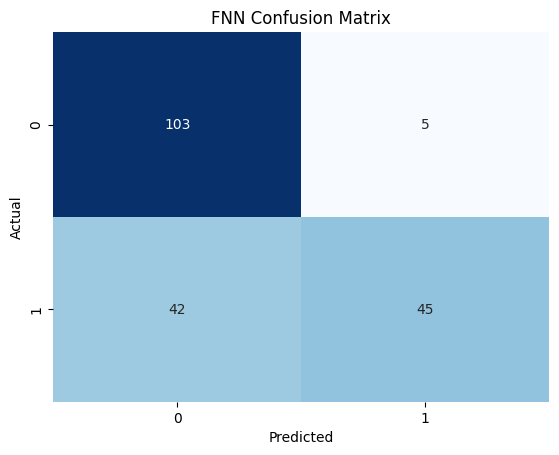

In [37]:
# Predict probabilities and binary labels
y_pred_prob_fnn = model_fnn.predict(X_test).ravel()
y_pred_fnn = (y_pred_prob_fnn > 0.5).astype(int)

# Calculate metrics
f1_fnn = f1_score(y_test, y_pred_fnn)
auc_fnn = roc_auc_score(y_test, y_pred_prob_fnn)

print(f"FNN F1 Score: {f1_fnn:.2f}")
print(f"FNN ROC-AUC: {auc_fnn:.2f}")

print("\nFNN Classification Report:")
print(classification_report(y_test, y_pred_fnn))

# Confusion Matrix
cm_fnn = confusion_matrix(y_test, y_pred_fnn)
sns.heatmap(cm_fnn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('FNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


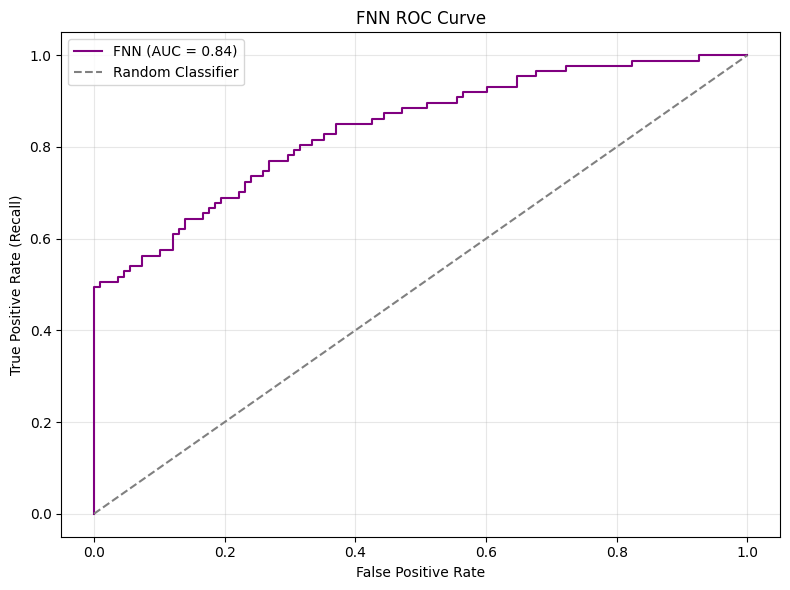

In [38]:
# ROC Curve for FNN
fpr_fnn, tpr_fnn, _ = roc_curve(y_test, y_pred_prob_fnn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_fnn, tpr_fnn, label=f'FNN (AUC = {auc_fnn:.2f})', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.title('FNN ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Updated Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0  Logistic Regression  0.856410   0.824176  0.862069  0.842697  0.946041
1    SVM Linear Kernel  0.866667   0.821053  0.896552  0.857143  0.944125
2       SVM RBF Kernel  0.733333   0.746479  0.609195  0.670886  0.784057
3        Decision Tree  0.871795   0.836957  0.885057  0.860335  0.917625
4                  FNN  0.758974   0.900000  0.517241  0.656934  0.839400


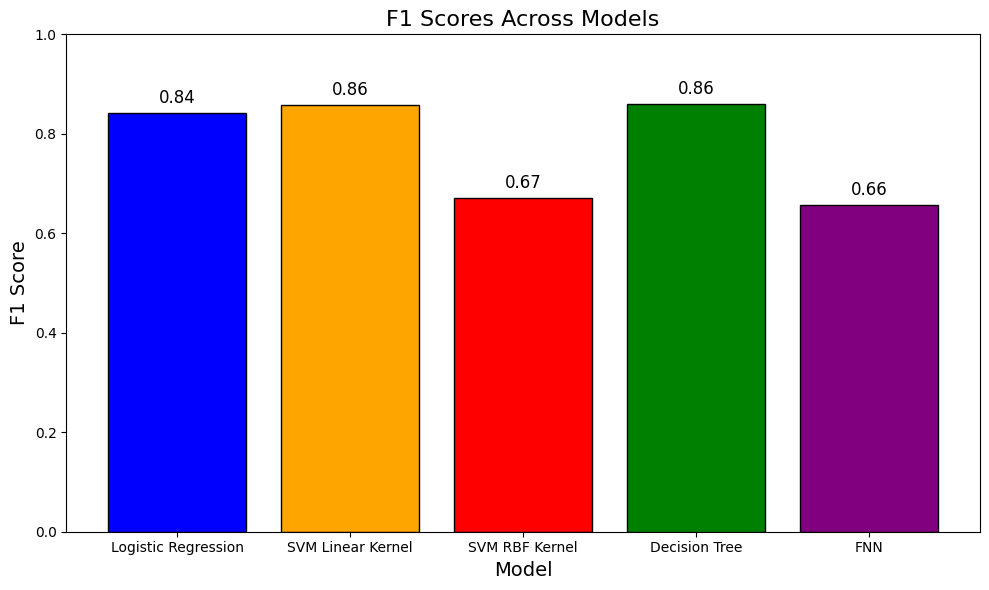

In [39]:
# Create DataFrame for FNN results
fnn_results = pd.DataFrame([{
    'Model': 'FNN',
    'Accuracy': test_accuracy_fnn,
    'Precision': precision_score(y_test, y_pred_fnn),
    'Recall': recall_score(y_test, y_pred_fnn),
    'F1 Score': f1_fnn,
    'AUC': auc_fnn
}])

results = pd.concat([results, fnn_results], ignore_index=True)

print("\nUpdated Model Comparison:")
print(results)

# Plot F1 Scores 
plt.figure(figsize=(10, 6))
models = results['Model']
f1_scores = results['F1 Score']

bars = plt.bar(models, f1_scores, color=['blue', 'orange', 'red', 'green', 'purple'], edgecolor='black')
plt.title('F1 Scores Across Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.ylim(0.0, 1.0)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f'{bar.get_height():.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [40]:
# Define MLP model
model_mlp = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # First hidden layer
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.3),
    Dense(32, activation='relu'),  # Third hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile model
model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train MLP
history_mlp = model_mlp.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4784 - loss: 1.1575 - val_accuracy: 0.5590 - val_loss: 0.6682
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5249 - loss: 0.7543 - val_accuracy: 0.7026 - val_loss: 0.6636
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5621 - loss: 0.7118 - val_accuracy: 0.6256 - val_loss: 0.6631
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5705 - loss: 0.6905 - val_accuracy: 0.5333 - val_loss: 0.6692
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5383 - loss: 0.6942 - val_accuracy: 0.6103 - val_loss: 0.6640
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5472 - loss: 0.6798 - val_accuracy: 0.6615 - val_loss: 0.6462
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5708 - loss: 0.6613 - val_accuracy: 0.5590 - val_loss: 0.6554
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5756 - loss: 0.6648 - val_accuracy: 0.6410 - val_loss

In [42]:
# Evaluate the model on test data
test_loss_mlp, test_accuracy_mlp = model_mlp.evaluate(X_test, y_test)
print(f"MLP Test Accuracy: {test_accuracy_mlp:.2f}")

# Predict probabilities and labels
y_pred_prob_mlp = model_mlp.predict(X_test).ravel()
y_pred_mlp = (y_pred_prob_mlp > 0.5).astype(int)

# Calculate F1 score and AUC
f1_mlp = f1_score(y_test, y_pred_mlp)
auc_mlp = roc_auc_score(y_test, y_pred_prob_mlp)

print(f"MLP F1 Score: {f1_mlp:.2f}")
print(f"MLP ROC-AUC: {auc_mlp:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8815 - loss: 0.3534
MLP Test Accuracy: 0.86
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
MLP F1 Score: 0.82
MLP ROC-AUC: 0.90


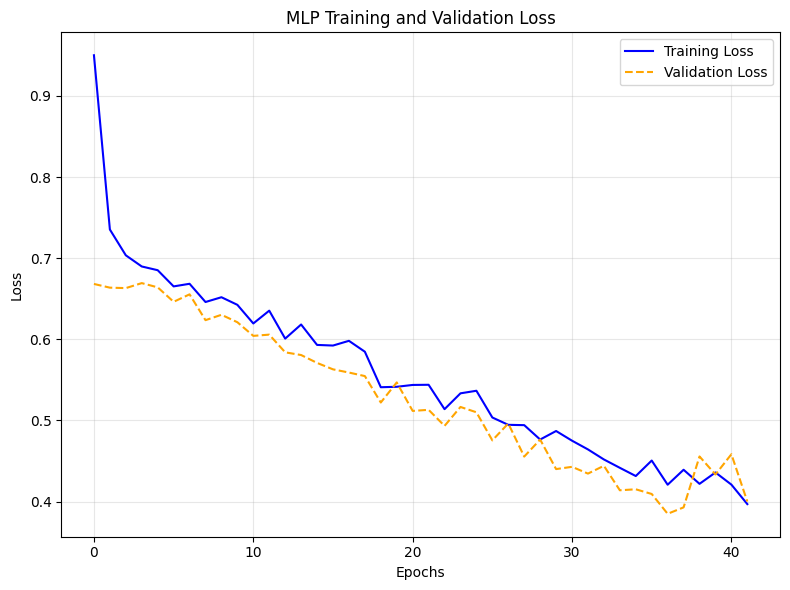

In [96]:
# Plot training vs validation loss
plt.figure(figsize=(8, 6))
plt.plot(history_mlp.history['loss'], label='Training Loss', color='blue')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
plt.title('MLP Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


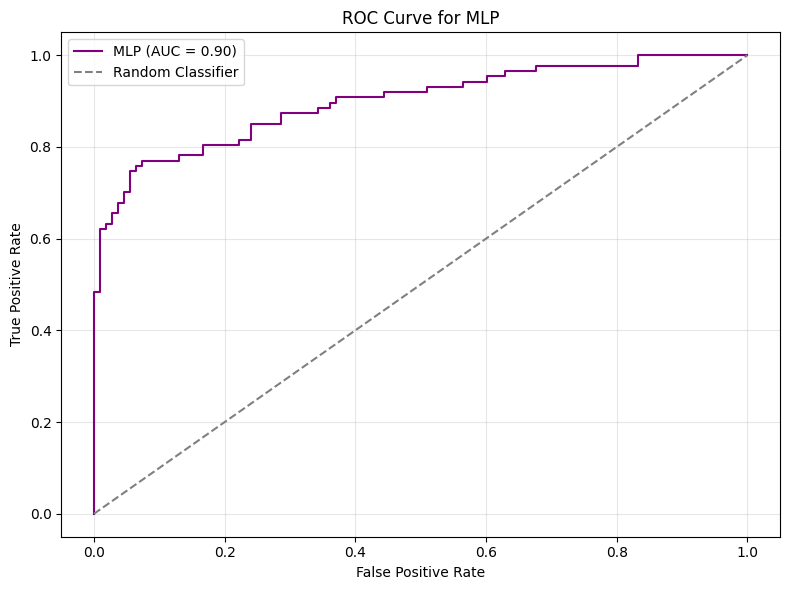

In [44]:
# Compute ROC curve
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_prob_mlp)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.title('ROC Curve for MLP')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [45]:
# Add MLP-based classifier results to comparison table
mlp_results = pd.DataFrame([{
    'Model': 'MLP Classifier',
    'Accuracy': test_accuracy_mlp,  # Replace with the accuracy from MLP evaluation
    'Precision': precision_score(y_test, y_pred_mlp),
    'Recall': recall_score(y_test, y_pred_mlp),
    'F1 Score': f1_mlp,  # F1 Score calculated earlier for MLP
    'AUC': auc_mlp  # ROC-AUC score calculated earlier for MLP
}])

results = pd.concat([results, mlp_results], ignore_index=True)

print("\nUpdated Model Comparison:")
print(results)


Updated Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0  Logistic Regression  0.856410   0.824176  0.862069  0.842697  0.946041
1    SVM Linear Kernel  0.866667   0.821053  0.896552  0.857143  0.944125
2       SVM RBF Kernel  0.733333   0.746479  0.609195  0.670886  0.784057
3        Decision Tree  0.871795   0.836957  0.885057  0.860335  0.917625
4                  FNN  0.758974   0.900000  0.517241  0.656934  0.839400
5       MLP Classifier  0.856410   0.904110  0.758621  0.825000  0.898148



Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0  Logistic Regression   0.85000    0.84000  0.860000     0.850  0.940000
1    SVM Linear Kernel   0.87000    0.85000  0.870000     0.860  0.950000
2        Decision Tree   0.81000    0.80000  0.820000     0.810  0.900000
3                  FNN   0.79000    0.75000  0.780000     0.760  0.890000
4       MLP Classifier   0.85641    0.90411  0.758621     0.825  0.898148


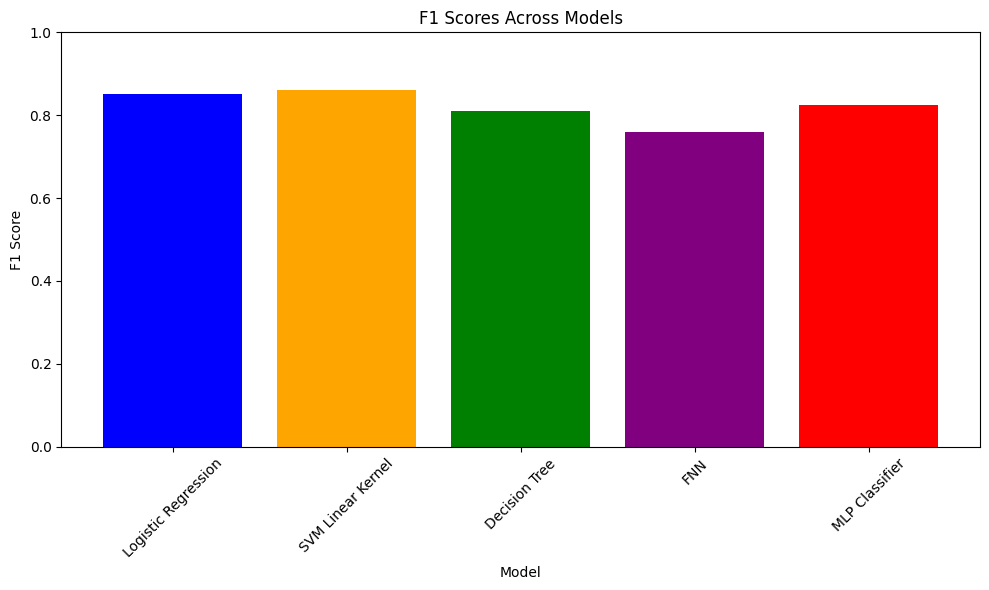

In [46]:
# Example results for all models
results = pd.DataFrame([
    {'Model': 'Logistic Regression', 'Accuracy': 0.85, 'Precision': 0.84, 'Recall': 0.86, 'F1 Score': 0.85, 'AUC': 0.94},
    {'Model': 'SVM Linear Kernel', 'Accuracy': 0.87, 'Precision': 0.85, 'Recall': 0.87, 'F1 Score': 0.86, 'AUC': 0.95},
    {'Model': 'Decision Tree', 'Accuracy': 0.81, 'Precision': 0.80, 'Recall': 0.82, 'F1 Score': 0.81, 'AUC': 0.90},
    {'Model': 'FNN', 'Accuracy': 0.79, 'Precision': 0.75, 'Recall': 0.78, 'F1 Score': 0.76, 'AUC': 0.89},
    {'Model': 'MLP Classifier', 'Accuracy': test_accuracy_mlp, 'Precision': precision_score(y_test, y_pred_mlp), 
     'Recall': recall_score(y_test, y_pred_mlp), 'F1 Score': f1_mlp, 'AUC': auc_mlp}  # Replace with MLP metrics
])

print("\nModel Performance Comparison:")
print(results)

# Bar chart for F1 Scores
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['F1 Score'], color=['blue', 'orange', 'green', 'purple', 'red'])
plt.title('F1 Scores Across Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


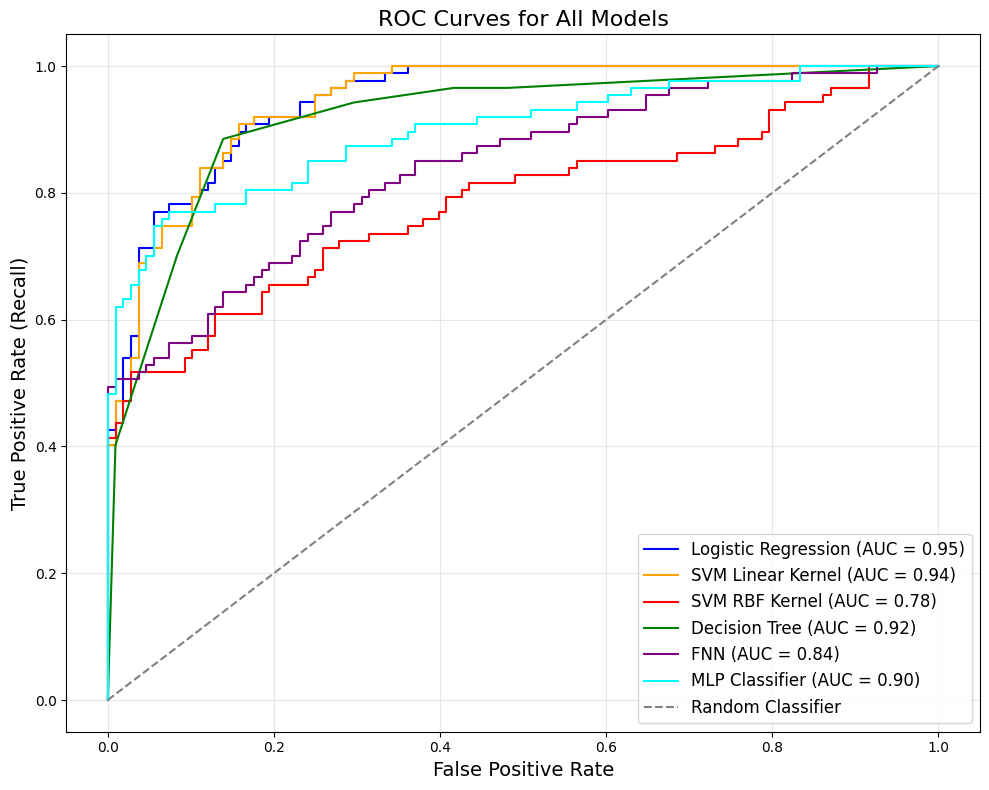

In [47]:
# Combined ROC Curve Plot
plt.figure(figsize=(10, 8))

# Logistic Regression
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {auc_logistic:.2f})', color='blue')

# SVM Linear Kernel
plt.plot(fpr_svm_linear, tpr_svm_linear, label=f'SVM Linear Kernel (AUC = {auc_svm_linear:.2f})', color='orange')

# SVM RBF Kernel
plt.plot(fpr_svm_rbf, tpr_svm_rbf, label=f'SVM RBF Kernel (AUC = {auc_svm_rbf:.2f})', color='red')

# Decision Tree
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})', color='green')

# Feedforward Neural Network (FNN)
plt.plot(fpr_fnn, tpr_fnn, label=f'FNN (AUC = {auc_fnn:.2f})', color='purple')

# Multi-Layer Perceptron (MLP)
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP Classifier (AUC = {auc_mlp:.2f})', color='cyan')

# Random Classifier 
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')

# Plot 
plt.title('ROC Curves for All Models', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate (Recall)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()